# 1. Voting Classifier

class sklearn.ensemble.VotingClassifier()

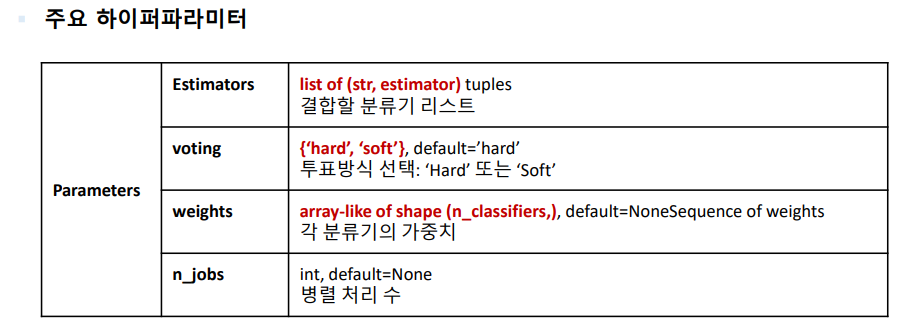

In [1]:
# 1. 데이터 로드

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle = True)

In [2]:
# 2. 개별 분류기 정의

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

In [3]:
# 3. VotingClassifier 정의 및 학습

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(f"VotingClassifier 정확도: {accuracy_score(y_test, y_pred)}")

VotingClassifier 정확도: 1.0


In [ ]:
# 4. 개별 모델 비교

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

print(f"Logistic Regression 정확도: {accuracy_score(y_test, y_pred1)}") # 수치형 데이터에서 성능이 좋다
print(f"DecisionTree        정확도: {accuracy_score(y_test, y_pred2)}")  
print(f"KNeighbors          정확도: {accuracy_score(y_test, y_pred3)}") # 비지도 학습에서 성능이 좋다

Logistic Regression 정확도: 1.0
DecisionTree        정확도: 1.0
KNeighbors          정확도: 1.0


### Voting Classifier 특징

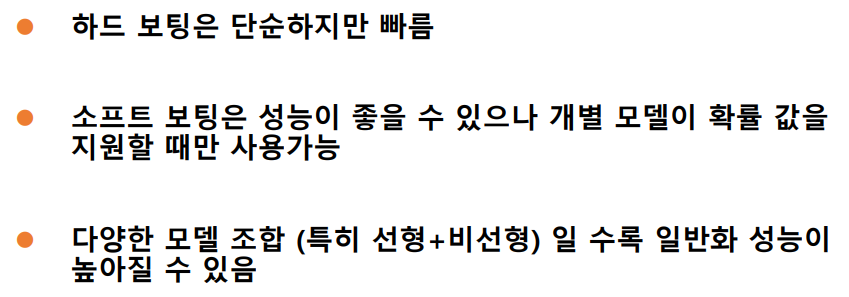

# 2. Random Forest
class sklearn.ensemble.RandomForestClassifier()

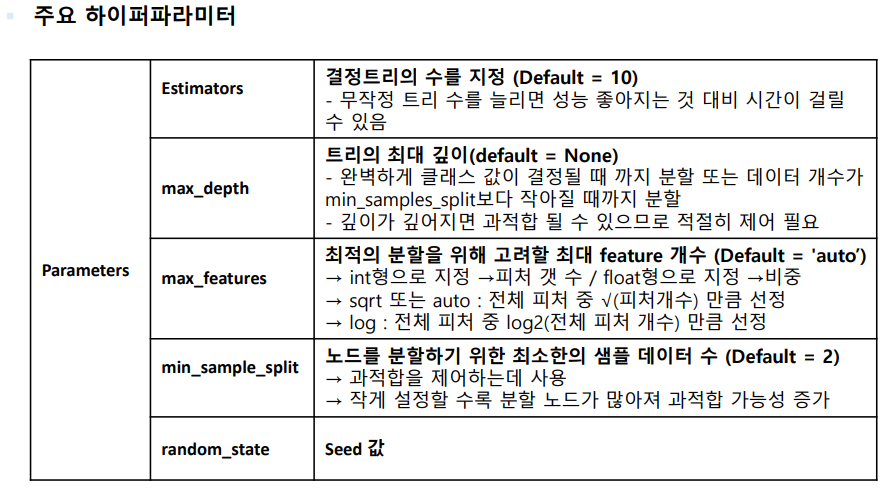

In [ ]:
# 1. 데이터 로드 및 분할

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# 2. 모델 학습 및 예측

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9707602339181286

In [11]:
# 3. Feature 중요도

importance_values = rf.feature_importances_
print(dataset.feature_names)
print(importance_values)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.06711822 0.01610094 0.08668948 0.02773732 0.00418899 0.01248333
 0.06281446 0.07799696 0.00507071 0.00483543 0.02450894 0.00418454
 0.00937375 0.03931726 0.00595254 0.00575778 0.00665888 0.00350647
 0.00322003 0.00464189 0.09349592 0.02111658 0.08951068 0.15417039
 0.00828703 0.0144749  0.01990018 0.11411539 0.00751821 0.00525279]


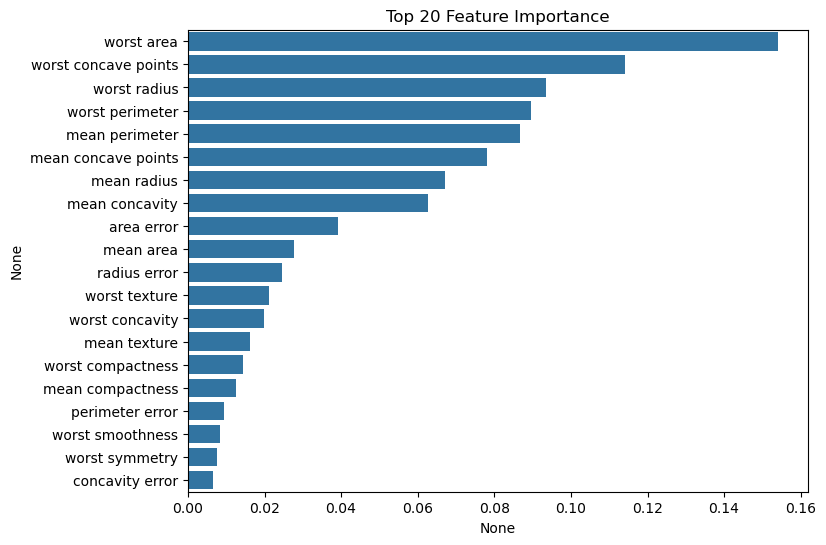

In [13]:
# 4. 결과 시각화

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

ftr_importance = pd.Series(importance_values, index=dataset.feature_names)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importance')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 3. Gradient Boost

In [14]:
# 1. 데이터 로드 및 분할

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# 2. 모델 학습 및 예측

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

importance_values = gb.feature_importances_

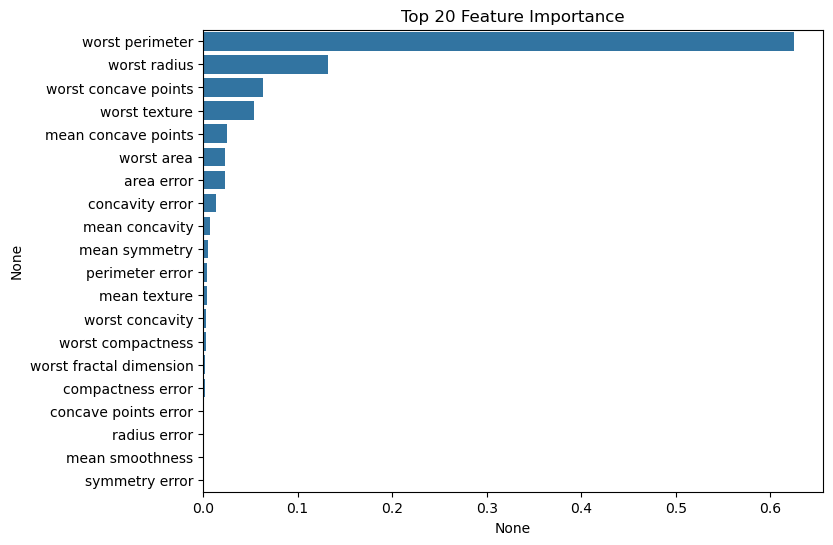

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

ftr_importance = pd.Series(importance_values, index=dataset.feature_names)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importance')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 4. XGBoost

In [24]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

df = load_breast_cancer()
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = XGBClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f"XGBoost 정확도: {accuracy_score(y_test, pred)}")

XGBoost 정확도: 0.9649122807017544


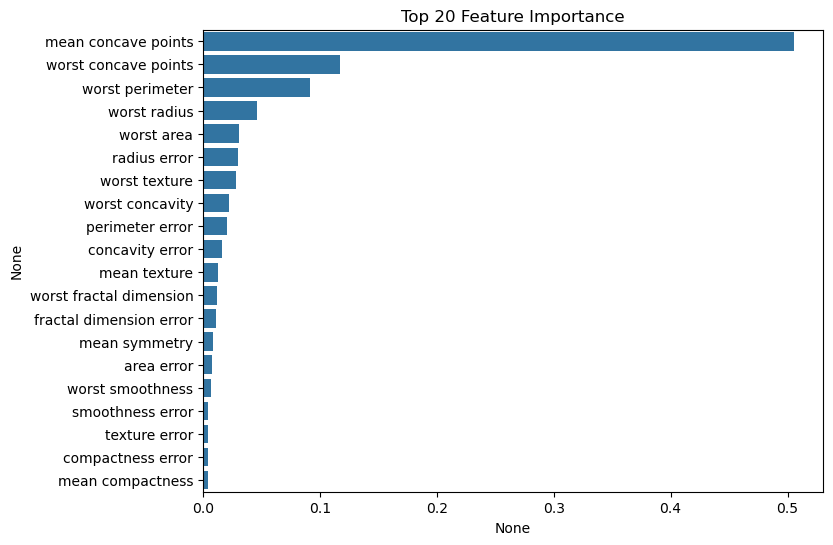

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importance_values = model.feature_importances_
ftr_importance = pd.Series(ftr_importance_values, index=df.feature_names)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importance')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 5. GridSearchCV

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

df = load_breast_cancer()
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators' : [50, 100],
    'max_depth' : [3, 5, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"최적의 하이퍼파라미터: {grid.best_params_}")
print(f"최고 정확도: {grid.best_score_:.4f}")
print(f"테스트 세트 정확도: {grid.score(X_test, y_test):.4f}")

최적의 하이퍼파라미터: {'max_depth': None, 'n_estimators': 100}
최고 정확도: 0.9497
테스트 세트 정확도: 0.9708
